In [39]:
import numpy as np
import torchvision
from matplotlib import pyplot as plt

from data.mnist_loader import load_mnist_batches, extract_mnist, get_augmentation_transform

# MNIST

In [30]:
dataset = extract_mnist(get_augmentation_transform(img_size=(512, 512)))

In [31]:
print(dataset.num_train_samples)
print(dataset.num_test_samples)

60000
10000


In [32]:
dataset.training_set[0]

(tensor([[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          ...,
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]],
 
         [[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          ...,
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]],
 
         [[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242,

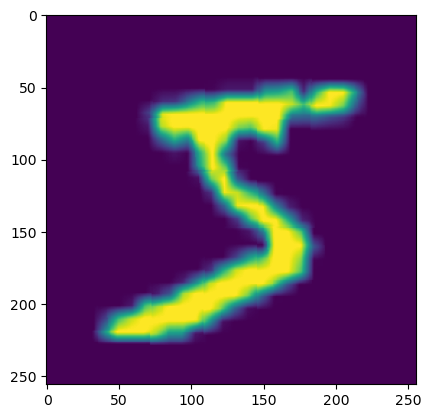

In [33]:
instance = dataset.training_set[0]
plt.imshow(instance[0][0])

In [36]:
batches_mnist_dataset = load_mnist_batches()

In [37]:
print(batches_mnist_dataset.batch_size)
print()
print(batches_mnist_dataset.num_train_samples)
print(batches_mnist_dataset.num_train_batches)
print()
print(batches_mnist_dataset.num_val_samples)
print(batches_mnist_dataset.num_val_batches)
print()
print(batches_mnist_dataset.num_test_samples)
print(batches_mnist_dataset.num_test_batches)

128

48000
375

12000
94

10000
79


Images shape: torch.Size([128, 3, 28, 28]), Labels shape: torch.Size([128])
Images dtype: torch.float32, Labels dtype: torch.int64


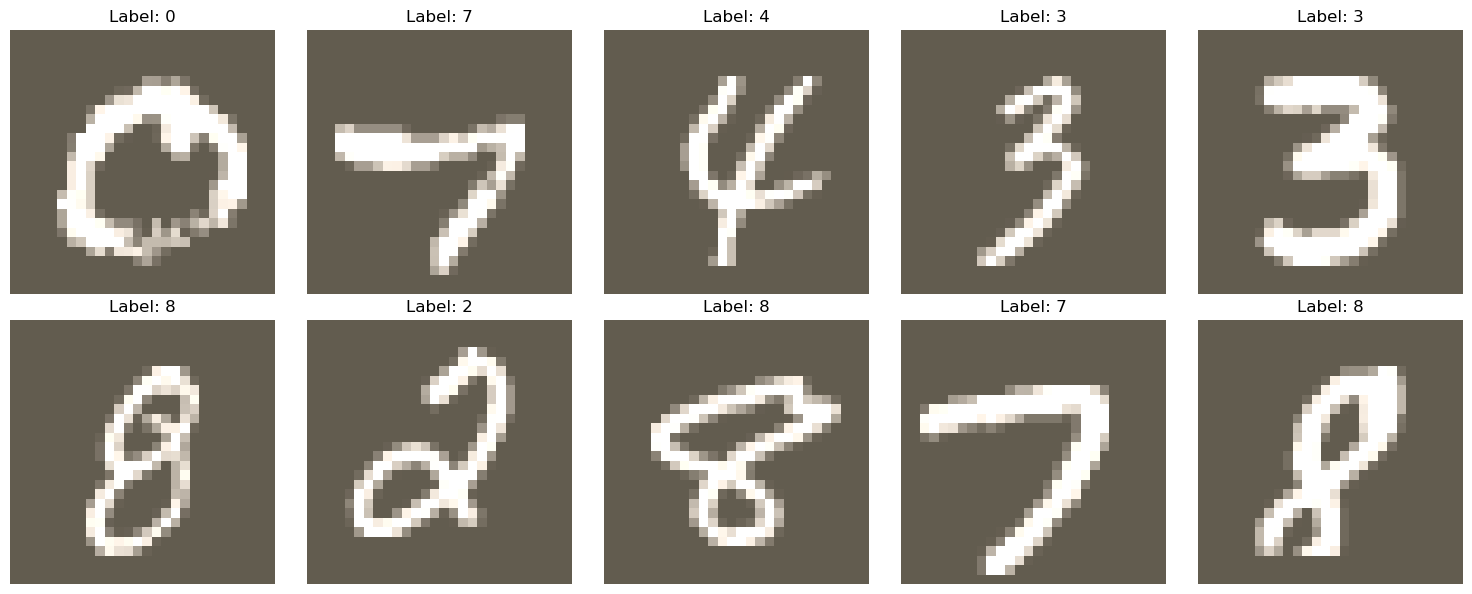

In [60]:
for images, labels in batches_mnist_dataset.train_loader:
    print(f'Images shape: {images.shape}, Labels shape: {labels.shape}')
    print(f'Images dtype: {images.dtype}, Labels dtype: {labels.dtype}')
    # Get the first 10 images and labels from your batch
    images_batch, labels_batch = images[:10], labels[:10]
    
    # Move images and labels to CPU and convert to NumPy arrays
    images_np = images_batch.cpu().numpy()
    labels_np = labels_batch.cpu().numpy()
    
    # Denormalize images if necessary
    # If you have normalized your images during preprocessing, you need to reverse that here.
    # Replace 'mean' and 'std' with the values you used during normalization.
    
    # Example normalization values (common for ImageNet models)
    # If you didn't normalize your images, you can skip the denormalization step.
    
    mean = np.array([0.485, 0.456, 0.406])  # Example values; replace with yours if different
    std = np.array([0.229, 0.224, 0.225])   # Example values; replace with yours if different
    
    # Denormalize the images
    images_np = images_np * std[None, :, None, None] + mean[None, :, None, None]
    images_np = np.clip(images_np, 0, 1)  # Ensure pixel values are within [0, 1]
    
    # Set up the plot
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    axes = axes.flatten()
    
    for idx, ax in enumerate(axes):
        img = images_np[idx]
        label = labels_np[idx]
        
        # Transpose the image to (H, W, C) format for plotting
        img = np.transpose(img, (1, 2, 0))
        
        ax.imshow(img)
        ax.set_title(f'Label: {label}')
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()
    break  # Only need to check one batch

In [1]:
from experiments import run_normal_single

usage: ipykernel_launcher.py [-h] --data-root DATA_ROOT [--workers WORKERS]
                             [--batch-size BATCH_SIZE] [--imageSize IMAGESIZE]
                             [--nz NZ] [--ngf NGF] [--ndf NDF]
                             [--epochs EPOCHS] [--lr LR] [--beta1 BETA1]
                             [--ngpu NGPU] [--netG NETG] [--netD NETD]
                             [--outf OUTF] [--manualSeed MANUALSEED]
                             [--target-digit TARGET_DIGIT] [--device DEVICE]
                             [--disable-dp] [--secure-rng] [-r R] [--sigma S]
                             [-c C] [--delta D]
ipykernel_launcher.py: error: the following arguments are required: --data-root


SystemExit: 2

C:\Users\Lorenzo\miniconda3\envs\cudaenv\Lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
run_normal_single()